# Содержание
* [Выбор локации для скважины](#section_id5)</a>
* [1. Загрузка и подготовка данных](#section_id1)</a>
* [2. Обучение и проверка модели](#section_id2)</a>
* [3. Подготовка к расчёту прибыли](#section_id3)</a>
* [4. Расчёт прибыли и рисков](#section_id4)</a>
* [Вывод](#section_id7)</a>
* [5. Чек-лист готовности проекта](#section_id6)</a>

# Выбор локации для скважины
<a id='section_id5'></a>

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных
<a id='section_id1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from tqdm.notebook import tqdm


In [3]:
geo0 = pd.read_csv('/datasets/geo_data_0.csv')
geo1 = pd.read_csv('/datasets/geo_data_1.csv')
geo2 = pd.read_csv('/datasets/geo_data_2.csv')

Описание данных

* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

In [4]:
geo0 #Выведим таблицу для ознокомления с ней.

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [5]:
geo1 #Выведим таблицу для ознокомления с ней.

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [6]:
geo2 #Выведим таблицу для ознокомления с ней.

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [7]:
geo0.info() # Посмотрим общую информацию.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
geo1.info() # Посмотрим общую информацию.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
geo2.info() # Посмотрим общую информацию.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
geo0.isna().sum(), geo1.isna().sum(), geo2.isna().sum() # Посмотрим пропуски.

(id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64,
 id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64,
 id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64)

In [11]:
print(geo0.duplicated().sum(), geo1.duplicated().sum(), geo2.duplicated().sum()) # Проверим есть ли явные дублекаты

0 0 0


Далее удалим столбци с данными которые непомогут нашему датасету в обучении.


CustomerId — уникальный идентификатор скважины

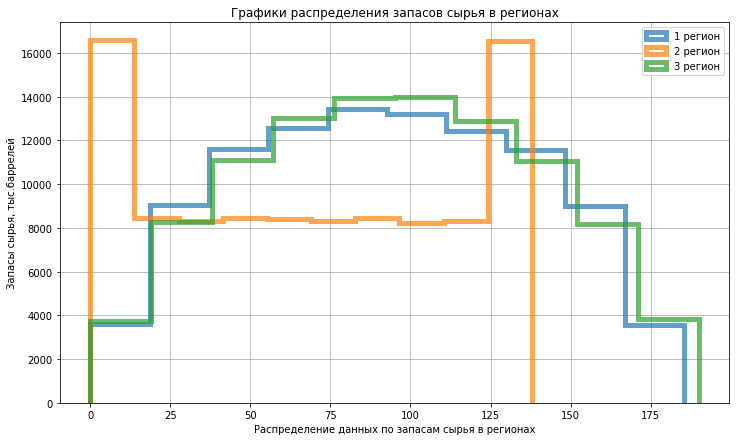

In [12]:
plt.title('Графики распределения запасов сырья в регионах')
ax=geo0['product'].plot(kind='hist',figsize=(
    12,7),grid=True, legend=True, alpha=0.7, histtype='step', linewidth=5, label='1 регион')
ax1=geo1['product'].plot(kind='hist',figsize=(
    12,7),grid=True, legend=True, alpha=0.7,histtype='step', linewidth=5, label='2 регион', ax=ax)
geo2['product'].plot(kind='hist',figsize=(
    12,7),grid=True, legend=True, alpha=0.7,histtype='step', linewidth=5, label='3 регион', ax=ax1)
plt.xlabel('Распределение данных по запасам сырья в регионах')
plt.ylabel('Запасы сырья, тыс.баррелей')
plt.show()

In [13]:
geo0 = geo0.drop(columns=['id'])
geo1 = geo1.drop(columns=['id'])
geo2 = geo2.drop(columns=['id'])

Резюме.

Пропусков и явных дубликатов небыло найдено. Удалили столбци мешаюшие модели обучатся.

In [14]:
# Вычисление матрицы корреляции для каждого датасета
corr_matrix_0 = geo0.corr()
corr_matrix_1 = geo1.corr()
corr_matrix_2 = geo2.corr()

print(corr_matrix_0)
print(corr_matrix_1)
print(corr_matrix_2)

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


## Обучение и проверка модели
<a id='section_id2'></a>

Сначала разделим выборку по условию задания на валидационную и обучающую в соотношении 75% на 25%. После извлекаем признаки и целевые признаки. Делаем это для 3 выборок отдельно. 

In [15]:
# Сначала разделим geo0 на валидационную и обучающую выборку.
# отделим 25% данных для валидационной выборки
train0, valid0 = train_test_split(geo0, test_size=0.25, random_state=12345)
# извлекаем признаки 
features_train0 = train0.drop(['product'], axis=1)# извлекаем признаки
target_train0 = train0['product']# извлекаем целевой признак

features_valid0 = valid0.drop(['product'], axis=1)
target_valid0 = valid0['product']

print(features_train0.shape) # количество строк и столбцов в обучающий выборки.
print(features_valid0.shape) # количество строк и столбцов в валидационной выборки.

(75000, 3)
(25000, 3)


In [16]:
model0 = LinearRegression()# инициализируйте модель LinearRegression
model0.fit(features_train0, target_train0) # обучите модель на тренировочной выборке
predictions_valid0 = model0.predict(features_valid0) # предсказания модели на валидационной выборке

mse0 = mean_squared_error(target_valid0, predictions_valid0) # средняя квадратичная ошибка (сумма квадратов ошибок обекта/количество обектов)



print("RMSE =", mse0 ** 0.5) # значение метрики RMSE на валидационной выборке (квадратный корень от значения MSE)
print("Mean =", predictions_valid0.mean()) #  Среднее арифметическое 

RMSE = 37.5794217150813
Mean = 92.59256778438035


In [17]:
# Повторим для geo1 разделим geo0 на валидационную и обучающую выборку.
# отделим 25% данных для валидационной выборки
train1, valid1 = train_test_split(geo1, test_size=0.25, random_state=12345)
# извлекаем признаки 
features_train1 = train1.drop(['product'], axis=1)# извлекаем признаки
target_train1 = train1['product']# извлекаем целевой признак

features_valid1 = valid1.drop(['product'], axis=1)
target_valid1 = valid1['product'] 

print(features_train1.shape)
print(features_valid1.shape)

(75000, 3)
(25000, 3)


In [18]:
model1 = LinearRegression()# инициализируйте модель LinearRegression
model1.fit(features_train1, target_train1) # обучите модель на тренировочной выборке
predictions_valid1 = model1.predict(features_valid1) # получите предсказания модели на валидационной выборке

mse1 = mean_squared_error(target_valid1, predictions_valid1) # среднеквадратическая отклонение



print("RMSE =", mse1 ** 0.5) # значение метрики RMSE на валидационной выборке
print("Mean =", predictions_valid1.mean()) #  Среднее арифметическое 

RMSE = 0.893099286775617
Mean = 68.728546895446


In [19]:
# Повторим для geo2 разделим geo0 на валидационную и обучающую выборку.
# отделим 25% данных для валидационной выборки
train2, valid2 = train_test_split(geo2, test_size=0.25, random_state=12345)
# извлекаем признаки 
features_train2 = train2.drop(['product'], axis=1)# извлекаем признаки
target_train2 = train2['product']# извлекаем целевой признак

features_valid2 = valid2.drop(['product'], axis=1)
target_valid2 = valid2['product'] 

print(features_train2.shape)
print(features_valid2.shape)

(75000, 3)
(25000, 3)


In [20]:
model2 = LinearRegression()# инициализируйте модель LinearRegression
model2.fit(features_train2, target_train2) # обучите модель на тренировочной выборке
predictions_valid2 = model2.predict(features_valid2) # получите предсказания модели на валидационной выборке

mse2 = mean_squared_error(target_valid2, predictions_valid2) # среднеквадратическая отклонение


print("RMSE =", mse2 ** 0.5) # значение метрики RMSE на валидационной выборке
print("Mean =", predictions_valid2.mean()) #  Среднее арифметическое 

RMSE = 40.02970873393434
Mean = 94.96504596800489


Резюме.

В результате видим, что самые большие средние запасы сырья  94.96 находятся в регионе geo2. При этом значение rmse 40 также самый высокий. Большое значение rmse региона говорит о большом разбросе ошибок, это дает более непредсказуемые результаты. В geo0 rmse 37, а  средние запасы сырья 92.59. В geo1 самый низкий rmse 0.89, но и запасы сырья минимальные 68.72.

## Подготовка к расчёту прибыли
<a id='section_id3'></a>

Условия задачи:

* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* Один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Распишем наши известные в переменные.

all_points - сколько всего месторождений - 500 точек

points - лучших месторождений - 200 точек

total_budget - бюджет всего региона - 10000000000 рублей

budget_of_one - бюджет одного месторождения - 10000000000 рублей / 200точек = 50000000

barell_profit - доход от бареля нефти - 450 рублей

cost_of_one - доход с каждой единицы продукта 450000 рублей,

risk_treshold - минимальная вероятность убытков - 2.5%

In [21]:
all_points = 500
points = 200
bootstrap_samples = 1000
total_budget = 10000000000
budget_of_one = 50000000
cost_of_one = 450000
barell_profit = 450
risk_treshold = 0.025

#посчитаем сколько баррелей нефти нужно разработать с одного месторождения, чтобы окупить вложения в разработку месторождения
# при условии, что обрабатываем 200 скважин
total_barell = budget_of_one / cost_of_one
print('Объём каждой скважины для безубыточной разработки должен составлять не менее: %.2f'%total_barell,'тыс.баррелей')

Объём каждой скважины для безубыточной разработки должен составлять не менее: 111.11 тыс.баррелей


In [22]:
product_mean0 = geo0['product'].mean()
product_mean1 = geo1['product'].mean()
product_mean2 = geo2['product'].mean()

In [23]:
print('Cредний запас сырья в 1 (geo0) регионе: %.2f'%product_mean0.mean(),'тыс.баррелей')
print('Cредний запас сырья в 2 (geo1) регионе: %.2f'%product_mean1.mean(),'тыс.баррелей')
print('Cредний запас сырья в 3 (geo2) регионе: %.2f'%product_mean2.mean(),'тыс.баррелей')

Cредний запас сырья в 1 (geo0) регионе: 92.50 тыс.баррелей
Cредний запас сырья в 2 (geo1) регионе: 68.83 тыс.баррелей
Cредний запас сырья в 3 (geo2) регионе: 95.00 тыс.баррелей


Резюме.

Исходя из полученных данных становится очевидно, что среднее количество запасов сырья по регионам недостаточное даже для окупаемости разработки, требуется выбрать наиболее прибыльные скважины.

### Напишем функцию расчёта прибыли

1 регион. Выполним привязку индексов скважин к предсказаниям модели geo0 и отсорируем список по убыванию

In [24]:
preds_sorted0 = pd.Series(predictions_valid0, index=target_valid0.index).sort_values(ascending=False)
selected_max0 = preds_sorted0[:200]
selected_max0

93073    180.180713
46784    176.252213
78948    175.850623
43388    175.658429
6496     173.299686
            ...    
30488    148.507064
98799    148.481767
53840    148.476498
4638     148.436761
75908    148.365941
Length: 200, dtype: float64

Просуммируем показатели 200 скважин с 1 участка (geo0) исходя из максимальных значений предсказаний нашей модели по объёму сырья для получения максимальной прибыли.

In [25]:
selected_max0.sum()

31102.3308388114

Рассчитаем прибыль для полученного объёма сырья

In [26]:
profit_pred0 = selected_max0.sum() * cost_of_one - total_budget

print('Прибыль для полученного объёма сырья составит %.2f рублей'%profit_pred0)

Прибыль для полученного объёма сырья составит 3996048877.47 рублей


2 регион. Выполним привязку индексов скважин к предсказаниям модели geo1 и отсорируем список по убыванию

In [27]:
preds_sorted1 = pd.Series(predictions_valid1, index=target_valid1.index).sort_values(ascending=False)
selected_max1 = preds_sorted1[:200]
selected_max1

38665    139.818970
20191    139.773423
14041    139.703330
24274    139.560938
92782    139.516754
            ...    
13370    138.421423
45823    138.416960
86987    138.413881
72313    138.412834
59892    138.410697
Length: 200, dtype: float64

In [28]:
selected_max1.sum()

27746.026782163426

In [29]:
profit_pred1 = selected_max1.sum() * cost_of_one - total_budget

print('Прибыль для полученного объёма сырья составит %.2f рублей'%profit_pred1)

Прибыль для полученного объёма сырья составит 2485712051.97 рублей


3 регион. Выполним привязку индексов скважин к предсказаниям модели geo2 и отсорируем список по убыванию

In [30]:
preds_sorted2 = pd.Series(predictions_valid2, index=target_valid2.index).sort_values(ascending=False)
selected_max2 = preds_sorted2[:200]
selected_max2

98619    165.856833
46649    165.679685
82661    163.439962
53151    162.062589
18747    161.797476
            ...    
66244    142.490763
34285    142.485922
36778    142.465777
7806     142.454763
62558    142.408851
Length: 200, dtype: float64

In [31]:
selected_max2.sum()

29603.898658318347

In [32]:
profit_pred2 = selected_max2.sum() * cost_of_one - total_budget

print('Прибыль для полученного объёма сырья составит %.2f рублей'%profit_pred2)

Прибыль для полученного объёма сырья составит 3321754396.24 рублей


Если разрабатывать 200 лучших скважин то каждый регеон показывают прибыль.

In [33]:
def profit_for_vp(predict,target,count):
    preds_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False)
    selected_max = preds_sorted[:count].sum()
    profit_pred=(selected_max*cost_of_one)-total_budget
    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max)
    print('Прибыль для полученного объёма сырья составит %.2f рублей'%(profit_pred))

Прибыль 1 регион

In [34]:
profit_for_vp(predictions_valid0, target_valid0, 200)

Суммарный запас сырья в 200 лучших скважинах составит: 31102.33 тыс.баррелей
Прибыль для полученного объёма сырья составит 3996048877.47 рублей


Прибыль 2 регион

In [35]:
profit_for_vp(predictions_valid1, target_valid1, 200)

Суммарный запас сырья в 200 лучших скважинах составит: 27746.03 тыс.баррелей
Прибыль для полученного объёма сырья составит 2485712051.97 рублей


Прибыль  3 регион

In [36]:
profit_for_vp(predictions_valid2, target_valid2, 200)

Суммарный запас сырья в 200 лучших скважинах составит: 29603.90 тыс.баррелей
Прибыль для полученного объёма сырья составит 3321754396.24 рублей


In [37]:
-total_budget

-10000000000

In [38]:
def profit_for_vp2(predict,target,count):
    preds_sorted = pd.Series(target, index=target.index).sort_values(ascending=False)
    selected_max = preds_sorted[:count].sum()
    profit_pred=(selected_max*cost_of_one)-total_budget
    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max)
    print('Прибыль для полученного объёма сырья составит %.2f рублей'%(profit_pred))

In [39]:
profit_for_vp2(predictions_valid0, target_valid0, 200) #Прибыль 1 регион

Суммарный запас сырья в 200 лучших скважинах составит: 36690.99 тыс.баррелей
Прибыль для полученного объёма сырья составит 6510947580.32 рублей


In [40]:
profit_for_vp2(predictions_valid1, target_valid1, 200) #Прибыль 2 регион

Суммарный запас сырья в 200 лучших скважинах составит: 27589.08 тыс.баррелей
Прибыль для полученного объёма сырья составит 2415086696.68 рублей


In [41]:
profit_for_vp2(predictions_valid2, target_valid2, 200) #Прибыль 3 регион

Суммарный запас сырья в 200 лучших скважинах составит: 37650.36 тыс.баррелей
Прибыль для полученного объёма сырья составит 6942663159.19 рублей


## Расчёт прибыли и рисков
<a id='section_id4'></a>

In [42]:
def profit_for_vp2(predict,target,count):
    predict = predict.reset_index(drop=True)
    preds_sorted = pd.Series(predict).sort_values(ascending=False)

    #target = target[preds_sorted.index].remove() # добавленная строка
    target = target.reset_index(drop=True)
    
    selected_points = target[preds_sorted.index][:count]


    # КОД РЕВЬЮЕРА
    if target[preds_sorted.index].shape[0] > preds_sorted.shape[0]:
        print("Shape mismatch! Targets shape:", target[preds_sorted.index].shape[0])


    product = selected_points.sum()
    revenue = product * cost_of_one
    return revenue - total_budget

In [43]:
# # КОД РЕВЬЮЕРА
_preds = pd.Series([1, 2, 2, 5, 5], index=[0, 1, 1, 3, 3])
_target = pd.Series([1, 2, 2, 5, 5], index=[0, 1, 1, 3, 3])

_target.loc[_preds.index]

0    1
1    2
1    2
1    2
1    2
3    5
3    5
3    5
3    5
dtype: int64

In [44]:
_preds.reset_index(drop=True) #сброс индексов
_target.reset_index(drop=True)

0    1
1    2
2    2
3    5
4    5
dtype: int64

In [45]:
target_valid1.nunique()

12

In [46]:
target_valid1.index.nunique()

25000

In [47]:
def bootstap_1000(target,predict):
    values = []
    count=0
    state = np.random.RandomState(12345)
    predict_e = pd.Series(predict, index=target.index)
    
    for i in tqdm(range(1000)):
        target_subsample = target.sample(n=500,replace=True, random_state=state)
  
        preds_subsample = predict_e[target_subsample.index]
        values.append(profit_for_vp2(preds_subsample,target_subsample, 200))  
    for i in values:
        if i < 0:
            count +=1
            
    values = pd.Series(values)
    mean = values.mean()

    
    plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(8,5))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    
    low_95 = values.quantile(0.025)
    high_95 = values.quantile(0.975)
    
    print("Средняя прибыль: {:.2f} тыс.руб".format(mean/1000))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} тыс.руб до: {:.2f} тыс.руб'.format(
        (low_95/1000),(high_95/1000)))

    print ('Процент вероятности убытка в данном регионе составит {:.1%}'.format(count/1000))

  0%|          | 0/1000 [00:00<?, ?it/s]

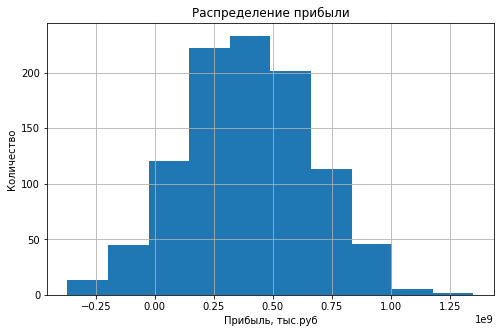

Средняя прибыль: 396164.98 тыс.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -111215.55 тыс.руб до: 909766.94 тыс.руб
Процент вероятности убытка в данном регионе составит 6.9%


In [48]:
bootstap_1000(target_valid0, predictions_valid0)

  0%|          | 0/1000 [00:00<?, ?it/s]

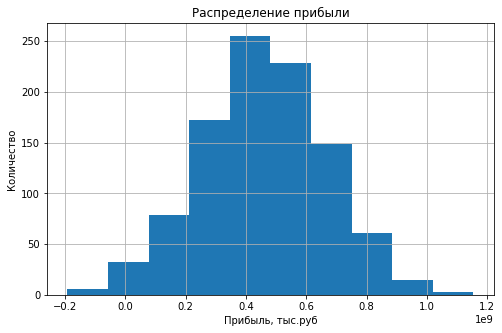

Средняя прибыль: 456045.11 тыс.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 33820.51 тыс.руб до: 852289.45 тыс.руб
Процент вероятности убытка в данном регионе составит 1.5%


In [49]:
bootstap_1000(target_valid1, predictions_valid1)

  0%|          | 0/1000 [00:00<?, ?it/s]

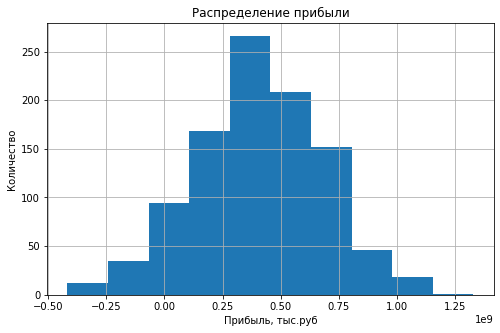

Средняя прибыль: 404403.87 тыс.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -163350.41 тыс.руб до: 950359.57 тыс.руб
Процент вероятности убытка в данном регионе составит 7.6%


In [50]:
bootstap_1000(target_valid2, predictions_valid2)

Резюме.

Даны условия задачи при оценки рисков где было нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Под такие условия подходит только второй регион (geo1).Процент вероятности убытка в данном регионе составит 1.0%. Такжк у него самая вычокая средняя прибль.

# Вывод
<a id='section_id7'></a>

Нам были предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Мы построили модель машинного обучения при помощи линейной регрессии, которая помогла определить регион, где добыча принесёт наибольшую прибыль. При первичном подсчети выяснили, что среднее количество запасов сырья по регионам недостаточное даже для окупаемости разработки, поэтому требуется выбрать наиболее прибыльные скважины. Выбрав 200 лучших скважин в каждом регионе, выяснили, что все регеоны показывают прибыль. Затем мы проанализировали возможную прибыль и риски техникой Bootstrap и нашли 95% доверительный интервал для среднего объема нефти в скважинах. Самый низкий процент убытка и самую высокую среднюю прибыль показал второй регеон (geo1). Средняя прибыль: 456045.11 тыс.руб. С вероятностью 95% прибыль в данном регионе будет составлять от: 33820.51 тыс.руб до: 852289.45 тыс.руб. Процент вероятности убытка в данном регионе составит 1.5%. Другие 2 регеона (первый geo0 и трети geo2) показали более низкую среднюю прибыль, а вероятность убытков превышает заданные 2.5%. Поэтому рекомендуем выбрать второй регеон (geo1) для ведения разработок.